# <span style="color:red; font-size:75px;"> Thuyết trình (Presentation) </span>

## Nhóm 13
## Thành viên 

1. Nguyễn Minh Sơn - 20110713
2. Lê Anh Nhân - 20110689
3. Đỗ Minh Dũng - 20110620
4. Nguyễn Thái Ngọc Tân - 20110719

# 1. Tóm tắt

Đại dịch covid-19 xuất hiện từ cuối năm 2019, cho đến nay nó đã lan rộng ra hầu hết các quốc gia và vùng lãnh thổ trên thế giới, gây thiệt hại nghiêm trọng về mọi mặt về kinh tế, xã hội....

Mặc dù đã có vaccine phòng ngừa covid-19 nhưng dịch bệnh này vẫn còn hoành hoành ở nhiều quốc gia, liên tục xuất hiện các biến thể mới nguy hiểm.

Vì thế, nhóm đã chọn tập dữ liệu liên quan đến vấn đề này để phân tích tình hình dịch bệnh covid-19. 

Nhóm đã đặt ra một số câu hỏi nghiên cứu về dịch Covid-19, đánh giá xem đại dịch này có phụ thuộc vào các yếu tố như nền kinh tế, dân số hay không? Tình hình dịch bệnh như thế nào khi biến thể Omicron xuất hiện? Hơn nữa, nhóm cũng muốn đánh giá xem liệu việc tiêm vaccine có làm giảm bớt số ca mắc, số ca tử vong hay làm giảm đi tỉ lệ tử vong của Covid-19 hay không ?

Để có thể trả lời cho các câu hỏi trên, nhóm đã sử dụng các phương pháp thống kê như kiểm định giả thuyết, các suy diễn về mỗi quan hệ giữa hai biến (C --> Q, Q --> Q ...)

Về kết quả, nhóm đã có thể trả lời được các câu hỏi nghiên cứu đặt ra

# 2. Dữ liệu

## 2.1 Mô tả dữ liệu

Link github chứa thư mục data: https://github.com/NMS1010/P4DA_Final_Project

File dữ liệu: owid-covid-data.csv

Giải thích các biến sử dụng

|Biến                                   |Mô tả
|:--------------------------------------|:--------------------------------------------------------------------------|
|`continent`                            |Tên châu lục                                                               |
|`location`                             |Tên nước                                                                   |
|`date`                                 |Ngày quan sát                                                              |
|`total_cases`                          |Tổng số ca mắc covid 19 đã được xác nhận                                   |
|`new_cases`                            |Số ca mắc mới covid 19 theo ngày đã được xác nhận                          |
|`total_cases_per_million`              |Tổng số ca mắc covid 19 đã được xác nhận trên 1,000,000 người              |
|`new_cases_per_million`                |Số ca mắc mới covid 19 theo ngày đã được xác nhận trên 1,000,000 người     |
|`total_deaths`                         |Tổng số ca covid 19 tử vong đã được xác nhận                               |
|`new_deaths`                           |Số ca covid 19 tử vong mới theo ngày đã được xác nhận                      |
|`total_deaths_per_million`             |Tổng số ca covid 19 tử vong đã được xác nhận trên 1,000,000 người          |
|`new_deaths_per_million`               |Số ca covid 19 tử vong mới theo ngày đã được xác nhận trên 1,000,000 người |
|`total_vaccinations`                   |Tổng số liều vaccine                                                       |
|`people_vaccinated`                    |Tổng số người tiêm ít nhất một mũi vaccine                                 |
|`people_fully_vaccinated`              |Tổng số người tiêm đủ liều vaccine theo quy định                           |
|`people_fully_vaccinated_per_hundred`  |Tổng số người tiêm đầy đủ vaccine theo quy định mỗi 100 người              |
|`population`                           |Tổng dân số                                                                |

## 2.2 Tiền xử lý dữ liệu

#### Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import scipy.stats as stats
#from bioinfokit.analys import stat
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
import pylab

#### Đọc và làm sạch dữ liệu

In [2]:
covid_df = pd.read_csv('../data/owid-covid-data.csv')

##### Lấy các biến cần thiết

In [3]:
covid_df = covid_df[['continent', 'location', 'date', 'total_cases',  'new_cases', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths', 'new_deaths', 'total_deaths_per_million', 'new_deaths_per_million', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred', 'population']]

##### Thay đổi tên các biến

In [4]:
covid_df.columns = ['Continent', 'Location', 'Date', 'TotalCases',  'NewCases', 'TotalCases_per_million', 'NewCases_per_million', 'TotalDeaths', 'NewDeaths', 'TotalDeaths_per_million', 'NewDeaths_per_million', 'TotalVaccinations', 'PeopleVaccinated', 'PeopleFullyVaccinated', 'PeopleFullyVaccinated_per_hundred', 'Population']

##### Kiểm tra dữ liệu

In [5]:
covid_df.isnull().sum()

Continent                              9956
Location                                  0
Date                                      0
TotalCases                             3033
NewCases                               3193
TotalCases_per_million                 3791
NewCases_per_million                   3951
TotalDeaths                           20875
NewDeaths                             20839
TotalDeaths_per_million               21620
NewDeaths_per_million                 21584
TotalVaccinations                    121132
PeopleVaccinated                     123339
PeopleFullyVaccinated                126085
PeopleFullyVaccinated_per_hundred    126085
Population                             1075
dtype: int64

Ta thấy vẫn còn nhiều ô nhận giá trị NULL, ta sẽ chuẩn hoá giá trị trong các cột này

##### Các khu vực không có tên châu lục

In [6]:
t = covid_df[covid_df['Continent'].isna()]
t.Location.unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'High income',
       'International', 'Low income', 'Lower middle income',
       'North America', 'Oceania', 'South America', 'Upper middle income',
       'World'], dtype=object)

Các giá trị trong cột `location` của datatframe thường là tên các quốc gia. Nhưng giá trị trong cột này lại tồn tại tên các châu lục hoặc các liên minh kinh tế trên thế giới (đây là tổng hợp chung tình hình dịch bệnh cho các khu vực đó), nên các cột `continent` tương ứng đã nhận giá trị NaN. Vì thế nhóm sẽ chuẩn hoá các giá trị NaN này thành 0

##### Các khu vực không có thông kê dân số

In [7]:
t = covid_df[covid_df['Population'].isna()]
t.Location.unique()

array(['International', 'Northern Cyprus'], dtype=object)

Một số khu vực trên thế giới như `International`, `Northern Cyprus` chưa có thống kê về dân số trong tập dữ liệu, nên nhóm sẽ bỏ qua các dòng dữ liệu 2 khu vực này.

##### Clean Data

Còn lại những cột có dữ liệu bị để trống (NULL) vì vào thời điểm quan sát thì có thể chưa xảy ra ca tử vong, chưa có ca mắc hoặc chưa có vaccine để tiêm phòng... 

`Vì thế, nhóm sẽ làm sạch dữ liệu của các cột nhận giá trị NaN khác bằng cách điền số 0`

In [8]:
covid_df = covid_df.replace('', np.nan).fillna(0)

Dữ liệu sau khi đã làm sạch

In [9]:
covid_df.isnull().sum()

Continent                            0
Location                             0
Date                                 0
TotalCases                           0
NewCases                             0
TotalCases_per_million               0
NewCases_per_million                 0
TotalDeaths                          0
NewDeaths                            0
TotalDeaths_per_million              0
NewDeaths_per_million                0
TotalVaccinations                    0
PeopleVaccinated                     0
PeopleFullyVaccinated                0
PeopleFullyVaccinated_per_hundred    0
Population                           0
dtype: int64

##### Thời gian thu thập dữ liệu về dịch bệnh

In [10]:
covid_world_df = covid_df[covid_df.Location == 'World']
print(f"Dữ liệu về dịch bệnh Covid-19 được thu thập từ ngày {covid_world_df.Date.min()} tới ngày {covid_world_df.Date.max()}")

Dữ liệu về dịch bệnh Covid-19 được thu thập từ ngày 2020-01-22 tới ngày 2022-03-05


## 2.3 Chi tiết về dữ liệu

### Hình thái dữ liệu

In [11]:
covid_df.shape

(166326, 16)

### 10 quan sát đầu tập dữ liệu

In [12]:
covid_df.head(10)

Continent     Location        Date  TotalCases  NewCases  \
0      Asia  Afghanistan  2020-02-24         5.0       5.0   
1      Asia  Afghanistan  2020-02-25         5.0       0.0   
2      Asia  Afghanistan  2020-02-26         5.0       0.0   
3      Asia  Afghanistan  2020-02-27         5.0       0.0   
4      Asia  Afghanistan  2020-02-28         5.0       0.0   
5      Asia  Afghanistan  2020-02-29         5.0       0.0   
6      Asia  Afghanistan  2020-03-01         5.0       0.0   
7      Asia  Afghanistan  2020-03-02         5.0       0.0   
8      Asia  Afghanistan  2020-03-03         5.0       0.0   
9      Asia  Afghanistan  2020-03-04         5.0       0.0   

   TotalCases_per_million  NewCases_per_million  TotalDeaths  NewDeaths  \
0                   0.126                 0.126          0.0        0.0   
1                   0.126                 0.000          0.0        0.0   
2                   0.126                 0.000          0.0        0.0   
3                   0.126                 0.000          0.0        0.0   
4                   0.126                 0.000          0.0        0.0   
5                   0.126                 0.000          0.0        0.0   
6                   0.126                 0.000          0.0        0.0   
7                   0.126                 0.000          0.0        0.0   
8                   0.126                 0.000          0.0        0.0   
9                   0.126                 0.000          0.0        0.0   

   TotalDeaths_per_million  NewDeaths_per_million  TotalVaccinations  \
0                      0.0                    0.0                0.0   
1                      0.0                    0.0                0.0   
2                      0.0                    0.0                0.0   
3                      0.0                    0.0                0.0   
4                      0.0                    0.0                0.0   
5                      0.0                    0.0                0.0   
6                      0.0                    0.0                0.0   
7                      0.0                    0.0                0.0   
8                      0.0                    0.0                0.0   
9                      0.0                    0.0                0.0   

   PeopleVaccinated  PeopleFullyVaccinated  PeopleFullyVaccinated_per_hundred  \
0               0.0                    0.0                                0.0   
1               0.0                    0.0                                0.0   
2               0.0                    0.0                                0.0   
3               0.0                    0.0                                0.0   
4               0.0                    0.0                                0.0   
5               0.0                    0.0                                0.0   
6               0.0                    0.0                                0.0   
7               0.0                    0.0                                0.0   
8               0.0                    0.0                                0.0   
9               0.0                    0.0                                0.0   

   Population  
0  39835428.0  
1  39835428.0  
2  39835428.0  
3  39835428.0  
4  39835428.0  
5  39835428.0  
6  39835428.0  
7  39835428.0  
8  39835428.0  
9  39835428.0

### 10 quan sát cuối tập dữ liệu

In [13]:
covid_df.tail(10)

Continent  Location        Date  TotalCases  NewCases  \
166316    Africa  Zimbabwe  2022-02-24    234967.0     378.0   
166317    Africa  Zimbabwe  2022-02-25    235467.0     500.0   
166318    Africa  Zimbabwe  2022-02-26    235803.0     336.0   
166319    Africa  Zimbabwe  2022-02-27    235803.0       0.0   
166320    Africa  Zimbabwe  2022-02-28    236380.0     577.0   
166321    Africa  Zimbabwe  2022-03-01    236871.0     491.0   
166322    Africa  Zimbabwe  2022-03-02    237503.0     632.0   
166323    Africa  Zimbabwe  2022-03-03    237503.0       0.0   
166324    Africa  Zimbabwe  2022-03-04    238739.0    1236.0   
166325    Africa  Zimbabwe  2022-03-05    239019.0     280.0   

        TotalCases_per_million  NewCases_per_million  TotalDeaths  NewDeaths  \
166316               15568.801                25.046       5390.0        2.0   
166317               15601.930                33.130       5392.0        2.0   
166318               15624.193                22.263       5393.0        1.0   
166319               15624.193                 0.000       5393.0        0.0   
166320               15662.425                38.232       5395.0        2.0   
166321               15694.959                32.533       5395.0        0.0   
166322               15736.835                41.876       5396.0        1.0   
166323               15736.835                 0.000       5396.0        0.0   
166324               15818.731                81.897       5397.0        1.0   
166325               15837.284                18.553       5397.0        0.0   

        TotalDeaths_per_million  NewDeaths_per_million  TotalVaccinations  \
166316                  357.139                  0.133          7858794.0   
166317                  357.271                  0.133          7870399.0   
166318                  357.338                  0.066          7876942.0   
166319                  357.338                  0.000          7882244.0   
166320                  357.470                  0.133          7890951.0   
166321                  357.470                  0.000          7901360.0   
166322                  357.536                  0.066          7910740.0   
166323                  357.536                  0.000          7921113.0   
166324                  357.603                  0.066          7930621.0   
166325                  357.603                  0.000                0.0   

        PeopleVaccinated  PeopleFullyVaccinated  \
166316         4351621.0              3384590.0   
166317         4355217.0              3388940.0   
166318         4357938.0              3390880.0   
166319         4359872.0              3392578.0   
166320         4362150.0              3396655.0   
166321         4365856.0              3399915.0   
166322         4368726.0              3402434.0   
166323         4372925.0              3406482.0   
166324         4374896.0              3408609.0   
166325               0.0                    0.0   

        PeopleFullyVaccinated_per_hundred  Population  
166316                              22.43  15092171.0  
166317                              22.45  15092171.0  
166318                              22.47  15092171.0  
166319                              22.48  15092171.0  
166320                              22.51  15092171.0  
166321                              22.53  15092171.0  
166322                              22.54  15092171.0  
166323                              22.57  15092171.0  
166324                              22.59  15092171.0  
166325                               0.00  15092171.0

# 3. Trực quan hoá dữ liệu

Thông tin các cột trong tập dữ liệu

In [14]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Continent                          166326 non-null  object 
 1   Location                           166326 non-null  object 
 2   Date                               166326 non-null  object 
 3   TotalCases                         166326 non-null  float64
 4   NewCases                           166326 non-null  float64
 5   TotalCases_per_million             166326 non-null  float64
 6   NewCases_per_million               166326 non-null  float64
 7   TotalDeaths                        166326 non-null  float64
 8   NewDeaths                          166326 non-null  float64
 9   TotalDeaths_per_million            166326 non-null  float64
 10  NewDeaths_per_million              166326 non-null  float64
 11  TotalVaccinations                  1663

Một số thống kê cơ bản về dữ liệu

In [15]:
covid_df.describe()

TotalCases      NewCases  TotalCases_per_million  \
count  1.663260e+05  1.663260e+05           166326.000000   
mean   2.489799e+06  1.134871e+04            28776.566195   
std    1.529680e+07  8.362675e+04            51446.106295   
min    0.000000e+00  0.000000e+00                0.000000   
25%    1.590000e+03  0.000000e+00              502.532000   
50%    2.365700e+04  7.100000e+01             4341.227500   
75%    2.844440e+05  1.013000e+03            36006.992000   
max    4.451295e+08  4.206334e+06           706541.904000   

       NewCases_per_million   TotalDeaths      NewDeaths  \
count         166326.000000  1.663260e+05  166326.000000   
mean             162.478031  5.042686e+04     149.695496   
std              675.336248  2.831655e+05     780.429560   
min                0.000000  0.000000e+00       0.000000   
25%                0.000000  2.200000e+01       0.000000   
50%               10.090500  3.690000e+02       1.000000   
75%               96.513500  5.269000e+03      14.000000   
max            51427.491000  5.995245e+06   18020.000000   

       TotalDeaths_per_million  NewDeaths_per_million  TotalVaccinations  \
count            166326.000000          166326.000000       1.663260e+05   
mean                443.172200               1.467914       4.673164e+07   
std                 751.568505               4.838418       4.120520e+08   
min                   0.000000               0.000000       0.000000e+00   
25%                   6.030000               0.000000       0.000000e+00   
50%                  70.584000               0.026000       0.000000e+00   
75%                 576.470000               1.011000       5.413925e+04   
max                6322.263000             453.772000       1.085079e+10   

       PeopleVaccinated  PeopleFullyVaccinated  \
count      1.663260e+05           1.663260e+05   
mean       2.278071e+07           1.680217e+07   
std        2.066693e+08           1.647341e+08   
min        0.000000e+00           0.000000e+00   
25%        0.000000e+00           0.000000e+00   
50%        0.000000e+00           0.000000e+00   
75%        1.108575e+04           0.000000e+00   
max        4.976031e+09           4.400787e+09   

       PeopleFullyVaccinated_per_hundred    Population  
count                      166326.000000  1.663260e+05  
mean                            7.858691  1.464803e+08  
std                            19.470750  7.033079e+08  
min                             0.000000  0.000000e+00  
25%                             0.000000  1.002197e+06  
50%                             0.000000  8.141343e+06  
75%                             0.000000  3.335942e+07  
max                           121.450000  7.874966e+09

In [16]:
def plot_bar(df, x, y, title):
    figure = px.bar(df, x = x, y = y, color = 'Continent', text = x, orientation='h', height=500,
                    color_discrete_sequence = px.colors.qualitative.Dark2)
    figure.update_layout(title=title, xaxis_title=x, yaxis_title=y, 
                    yaxis_categoryorder = 'total ascending',
                    uniformtext_minsize=8, uniformtext_mode='hide', template='plotly_dark')
    figure.show()

In [17]:
def plot_hbar(df, col, number, title):
    figure = px.bar(df.sort_values(col).tail(number), x = col, y = 'Location', color = 'Continent', text = col, orientation='h', height=700,
                   color_discrete_sequence = px.colors.qualitative.Dark2)
    figure.update_layout(title=title, xaxis_title=col, yaxis_title="Country", 
                    yaxis_categoryorder = 'total ascending',
                    uniformtext_minsize=8, uniformtext_mode='hide', template='plotly_dark')
    figure.show()

In [18]:
def plot_sub_lines(df, x, y1, y2, title):
    fig = make_subplots(rows=1, cols=2)
    fig.add_trace(
        go.Scatter(x=df[x], y = df[y1], mode="lines", name=y1),
        row = 1, 
        col = 1
    )
    fig.add_trace(
        go.Scatter(x=df[x], y = df[y2], mode="lines", name=y2),
        row = 1, 
        col = 2
    )
    fig.update_layout(height=600, width=1200, title_text=title, template='plotly_dark')
    fig.show()

In [19]:
def plot_map(df, col, title, size, range):
    fig = px.scatter_geo(df, locations='Location', locationmode="country names", 
                        color=col, size=size, 
                        range_color= range, 
                        hover_name='Location',
                        projection="natural earth",     
                        title=title, color_continuous_scale="portland")
    fig.update_layout(
        template='plotly_dark',
        )
    fig.show()

In [20]:
def plot_pie(df, values, names, title):
    fig = px.pie(df, values=values, names=names, title=title)
    fig.update_layout(
        template='plotly_dark',
        )
    fig.show()

In [21]:
def plot_scatter(df, _x, _y, title, hover_name):
    fig = px.scatter(df, x=_x, y=_y, color = _y,
                 size=_y, hover_name= hover_name, title=title, trendline="ols", color_continuous_scale=px.colors.sequential.Viridis)
    fig.show()

In [22]:
covid_group_loction = covid_df.copy()
covid_group_loction = covid_group_loction[covid_group_loction.Continent != 0]
covid_group_loction = covid_group_loction.groupby(['Location'])['TotalCases', 'TotalDeaths'].max()
covid_group_loction = covid_group_loction.reset_index()
covid_group_loction['SizeCases'] = covid_group_loction['TotalCases'].pow(0.3)
covid_group_loction['SizeDeaths'] = covid_group_loction['TotalCases'].pow(0.3)

C:\Users\nguye\AppData\Local\Temp\ipykernel_5696\2878369555.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_group_loction = covid_group_loction.groupby(['Location'])['TotalCases', 'TotalDeaths'].max()


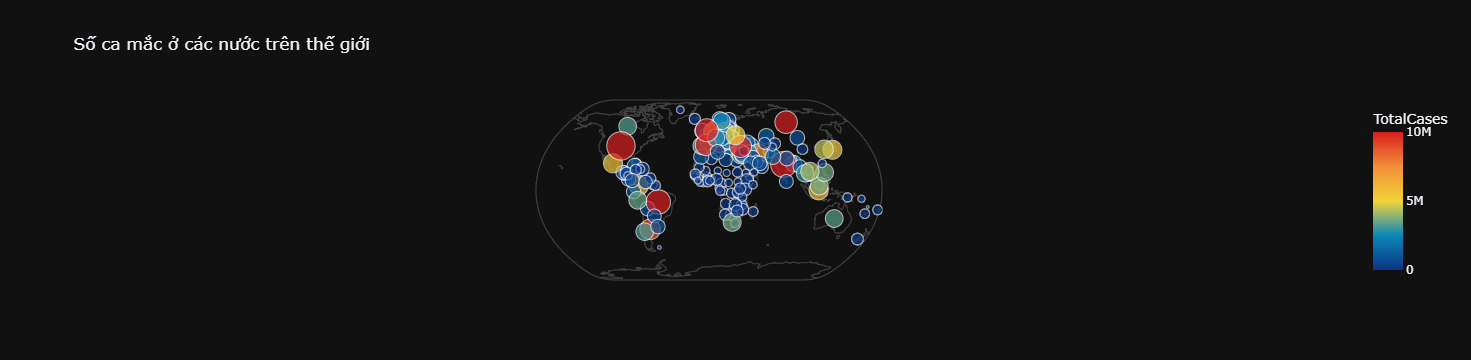

In [23]:
plot_map(covid_group_loction, "TotalCases", "Số ca mắc ở các nước trên thế giới", 'SizeCases', [0, 10**7])

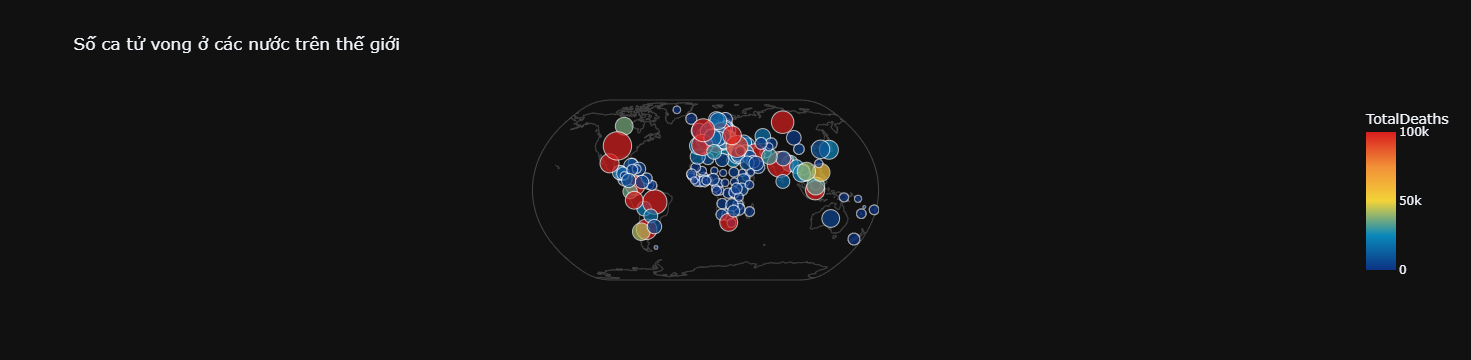

In [24]:
plot_map(covid_group_loction, "TotalDeaths", "Số ca tử vong ở các nước trên thế giới", 'SizeDeaths', [0, 10**5])

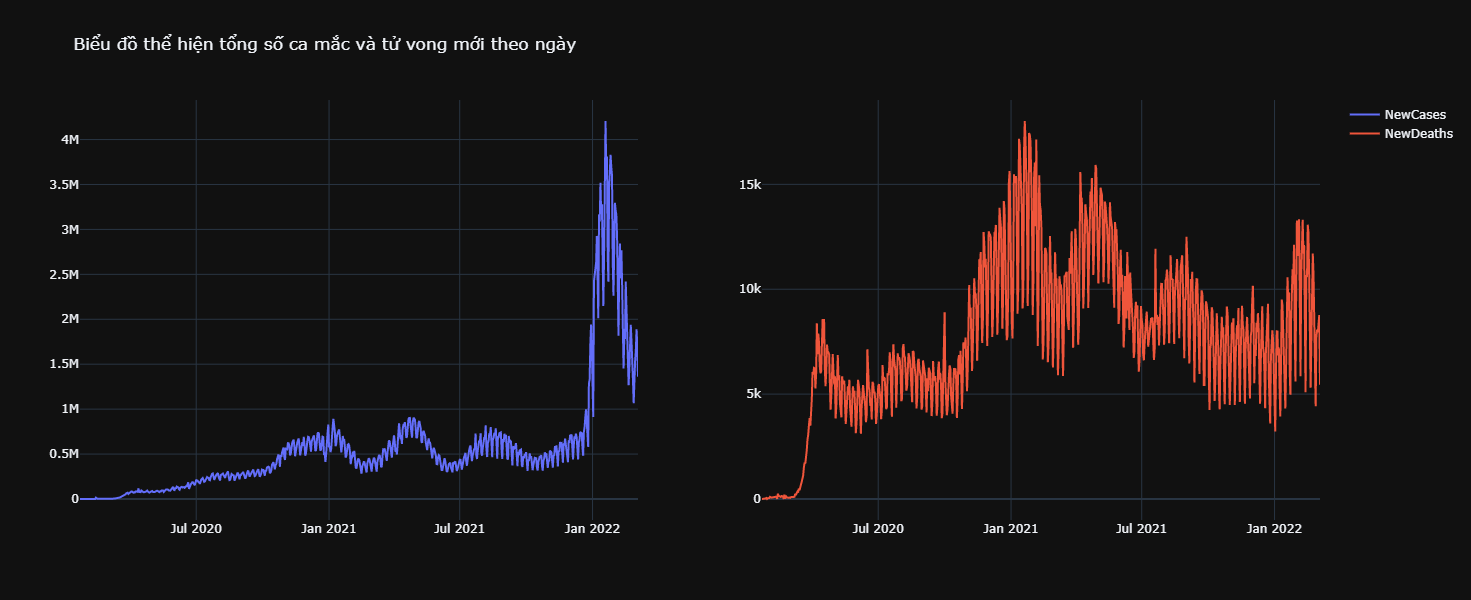

In [25]:
plot_sub_lines(covid_world_df, 'Date', 'NewCases', 'NewDeaths', "Biểu đồ thể hiện tổng số ca mắc và tử vong mới theo ngày")

Vào khoảng cuối năm 2021, biến thể Omicron xuất hiện làm gia tăng nhanh số ca nhiễm mỗi ngày nhưng số ca tử vong theo ngày của biến thể này không cao so với biến thể Delta xuất hiện trước đó. Có lẽ do khi biến thể Omicron xuất hiện thì độ bao phủ vaccine trên thế giới cũng đã tăng cao.

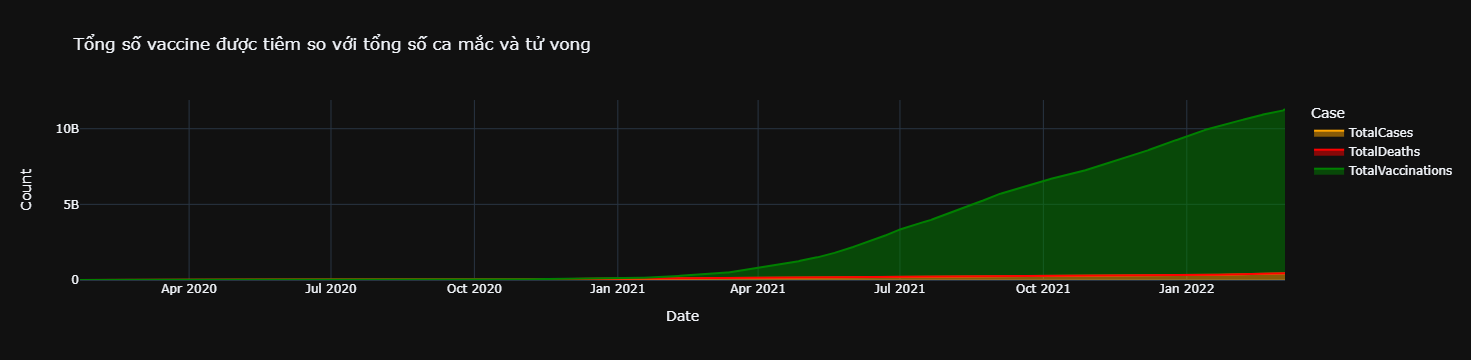

In [26]:
covid_world_df_melt = covid_world_df.melt(id_vars="Date", value_vars=['TotalCases', 'TotalDeaths', 'TotalVaccinations'],
                 var_name='Case', value_name='Count')
fig = px.area(covid_world_df_melt, x="Date", y="Count", color='Case',
title='Tổng số vaccine được tiêm so với tổng số ca mắc và tử vong', color_discrete_sequence = ['orange', 'red','green' ])
fig.update_layout(template='plotly_dark',)
fig.show()

Vaccine xuất hiện vào khoảng đầu năm 2021, từ đó độ bao phủ vaccine trên toàn thế giới ngày càng lớn dần, bỏ xa tổng số ca mắc và số ca tử vong. Vaccine có thể xem công cụ hiệu quả nhất hiện tại , tiến độ tiêm phòng như vậy đang cho thấy tín hiệu tích cực trong việc phòng chống và đi tới chấm dứt đại dịch Covid-19

# 4. Kết quả thực nghiệm

## Câu 1: Dân số có phải là nguyên nhân dẫn tới việc gia tăng số ca mắc ở các nước châu Á ?

Nhóm dựa vào input đầu vào là các biến `Population`, `TotalCases`, `Location`  để xác định xem có sự phụ thuộc nào giữa dân số và số ca mắc ở các nước châu Á hay không bằng suy luận thống kê giữa hai biến số (Q --> Q)

<font face="Cambria Math" size=5 color = #1155cc> Quan hệ 𝑄 → 𝑄 </font>

*  <font face="Cambria Math" size=4> Với Q: Biến Population (Biến quantitative) </font>
* <font face="Cambria Math" size=4>  Với 𝑄: Biến TotalCases (Biến quantitative)</font>

In [27]:
population_country = covid_df.groupby(by = 'Location').agg({'Continent' : 'first', 'Population': 'max'})
population_country = population_country.groupby(by = "Continent").agg({'Continent' : 'first', 'Population': 'sum'})
population_country = population_country[population_country.Continent != 0]
population_country

Continent    Population
Continent                                 
Africa                Africa  1.371693e+09
Asia                    Asia  4.652616e+09
Europe                Europe  7.506718e+08
North America  North America  5.928348e+08
Oceania              Oceania  4.320246e+07
South America  South America  4.339537e+08

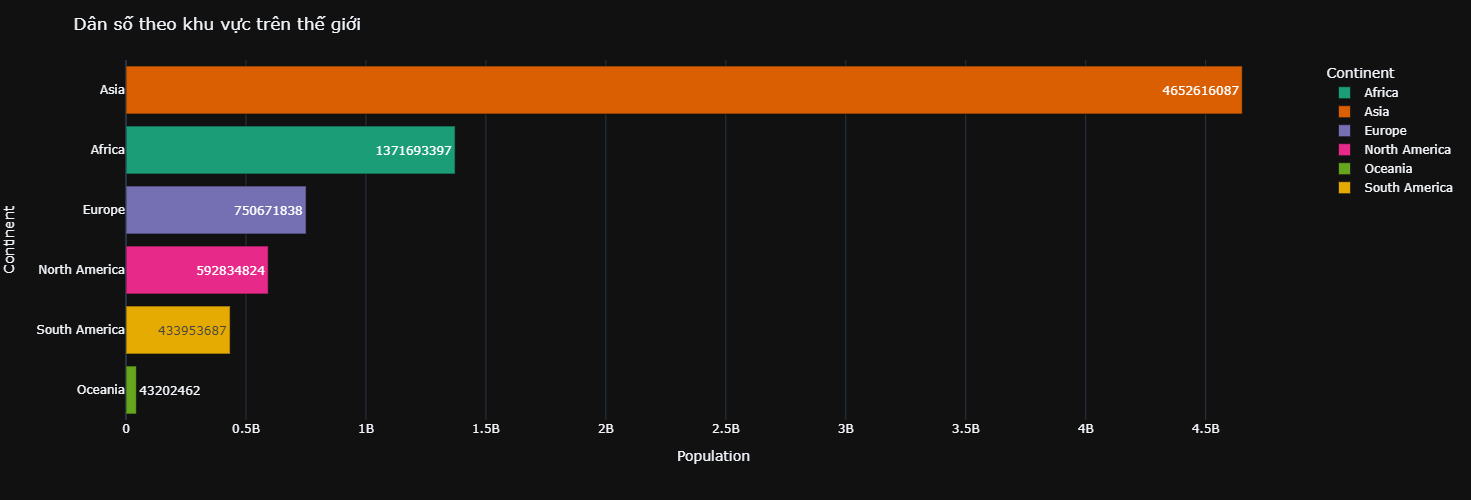

In [28]:
plot_bar(population_country, "Population", "Continent", "Dân số theo khu vực trên thế giới")

Từ biểu đồ trên, ta có thể thấy châu Á là châu lục có số dân đông nhất thế giới, vượt xa các châu lục khác. 

Châu Á là nơi dự đoán có thể có số ca mắc Covid-19 nhiều nhất trên thế giới do dân số đông. 

Ta cùng thực hiện phép thông kê để kiểm chứng liệu dân số đông có phải là nguyên nhân dẫn tới gia tăng số ca mắc hay không ?

In [29]:
cases_country = covid_df.groupby(by = 'Location').agg({'Continent' : 'first','Location' : 'first', 'TotalCases': 'max', 'Population': 'max'})
cases_country = cases_country[cases_country["Continent"] != 0]
cases_Asia = cases_country.loc[cases_country['Continent'] == "Asia"]
cases_Asia.head()

Continent     Location  TotalCases   Population
Location                                                   
Afghanistan      Asia  Afghanistan    174331.0   39835428.0
Armenia          Asia      Armenia    421226.0    2968128.0
Azerbaijan       Asia   Azerbaijan    788958.0   10223344.0
Bahrain          Asia      Bahrain    525171.0    1748295.0
Bangladesh       Asia   Bangladesh   1946737.0  166303494.0

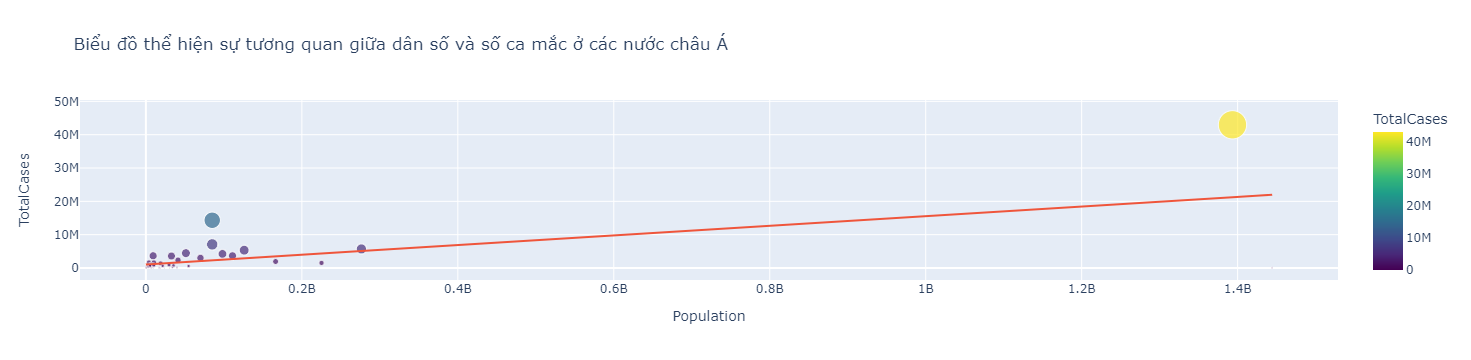

In [30]:
plot_scatter(cases_Asia, "Population", "TotalCases", "Biểu đồ thể hiện sự tương quan giữa dân số và số ca mắc ở các nước châu Á","Location")

***Tính hệ số tương quan để xem mối quan hệ giữa hai biến***

In [31]:
R = np.corrcoef(cases_Asia["Population"], cases_Asia["TotalCases"])
R

array([[1.        , 0.63435655],
       [0.63435655, 1.        ]])

Theo biểu đồ, ta thấy có 2 giá trị ngoại lai ứng với 2 nước là Trung Quốc và Ấn Độ.

Trung Quốc là nước đông dân nhất thế giới, đồng thời là nơi khởi nguồn của dịch bệnh nhưng số ca mắc Covid-19 ở nước này lại không cao. 

Còn trường hợp là Ấn Độ, nước có dân số đông chỉ sau Trung Quốc nhưng số ca mắc cũng tăng nhanh.

Ta thử bỏ điểm dữ liệu này để xem sự khác biệt về hệ số tương quan
 

In [32]:
cases_Asia = cases_Asia.loc[cases_Asia['Location'] != "India"]
cases_Asia = cases_Asia.loc[cases_Asia['Location'] != "China"]

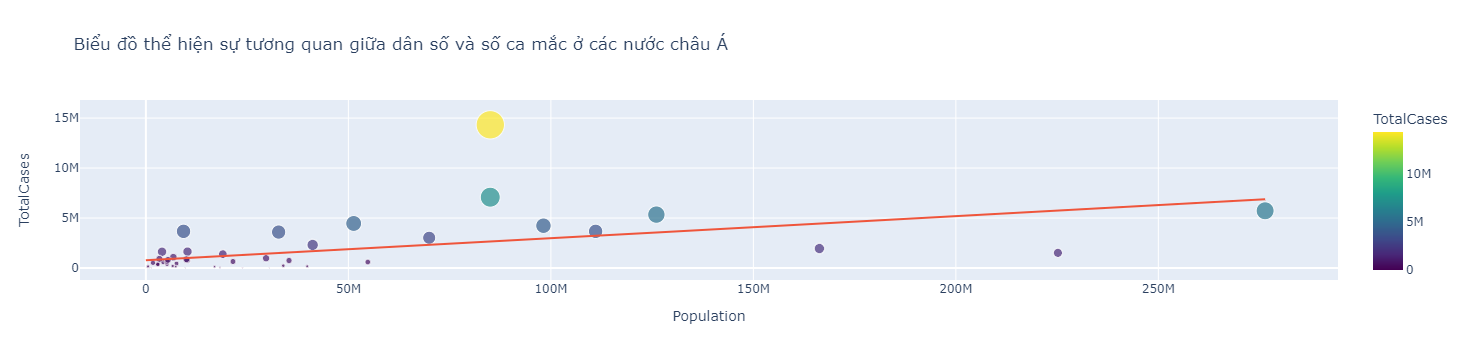

In [33]:
plot_scatter(cases_Asia, "Population", "TotalCases", "Biểu đồ thể hiện sự tương quan giữa dân số và số ca mắc ở các nước châu Á", "Location")

***Tính lại hệ số tương quan để xem mối quan hệ giữa hai biến***

In [34]:
R = np.corrcoef(cases_Asia["Population"], cases_Asia["TotalCases"])
R

array([[1.        , 0.50531549],
       [0.50531549, 1.        ]])

Ta thấy hệ số tương quan giảm so với lúc trước khi bỏ hai giá trị ngoại lai

**Ta đặt giả thuyết thống kê**

H0: Hai biến không có mối quan hệ tuyến tính

H1: Hai biến có mối quan hệ tuyến tính

In [35]:
slope, intercept, r_value, p_value, std_err = stats.linregress(cases_Asia["Population"], cases_Asia["TotalCases"])
p_value

0.00024904745478979666

In [36]:
print(f"Ta tính được giá trị P-value = {p_value} < 0.05")
print(f"Ta bác bỏ H0, chấp nhận H1")

Ta tính được giá trị P-value = 0.00024904745478979666 < 0.05
Ta bác bỏ H0, chấp nhận H1


Tuy nhiên, vì hệ số tương quan R = 0.5 không quá mạnh cũng không quá yếu, ta cũng chưa thể kết luận ngay dân số có ảnh hưởng đến số ca mắc Covid-19 ở các quốc gia châu Á hay không vì còn nhiều yếu tố ảnh hưởng khác như hệ thống y tế, chính sách cách ly của mỗi quốc gia...

## Câu 2: Có phải các nước có nền kinh tế phát triển, thu nhập cao thì dịch bệnh Covid-19 sẽ ít nghiêm trọng hơn so với có nền kinh tế phát triển kém hơn, thu nhập thấp hơn không ?

Dựa vào input đầu vào là các biến `Location`, `TotalCases`, `TotalDeaths` để xác định xem có sự phụ thuộc nào giữa số ca mắc, số ca tử vong và tỉ lệ tử vong với nền kinh tế của các nước ở hai nhóm nước phát triển và kém phát triển hơn hay không bằng thống kê T-test giữa hai nhóm độc lập (C --> Q)

In [37]:
covid_country = covid_df.copy()
covid_country = covid_country.groupby(by= 'Location').agg({'Continent': 'first', 'Location': 'first', 'TotalCases': 'max', 'TotalDeaths': 'max'})
covid_country = covid_country[covid_country.Continent != 0]


Lấy tên các quốc gia có trong dữ liệu

In [38]:
list_country = list([])
list_country = covid_country['Location'].unique().tolist()

Sắp xếp số ca mắc covid-19 từ cao xuống thấp theo các quốc gia

In [39]:
covid_country.sort_values('TotalCases', inplace= True, ascending= False)
covid_country

Continent                   Location  \
Location                                                              
United States              North America              United States   
India                               Asia                      India   
Brazil                     South America                     Brazil   
France                            Europe                     France   
United Kingdom                    Europe             United Kingdom   
...                                  ...                        ...   
Guernsey                          Europe                   Guernsey   
Nauru                            Oceania                      Nauru   
Sint Maarten (Dutch part)  North America  Sint Maarten (Dutch part)   
Niue                             Oceania                       Niue   
Jersey                            Europe                     Jersey   

                           TotalCases  TotalDeaths  
Location                                            
United States              79265726.0     958437.0  
India                      42962953.0     515036.0  
Brazil                     29040800.0     652216.0  
France                     23064766.0     139312.0  
United Kingdom             19172095.0     162152.0  
...                               ...          ...  
Guernsey                          0.0          0.0  
Nauru                             0.0          0.0  
Sint Maarten (Dutch part)         0.0          0.0  
Niue                              0.0          0.0  
Jersey                            0.0          0.0  

[225 rows x 4 columns]

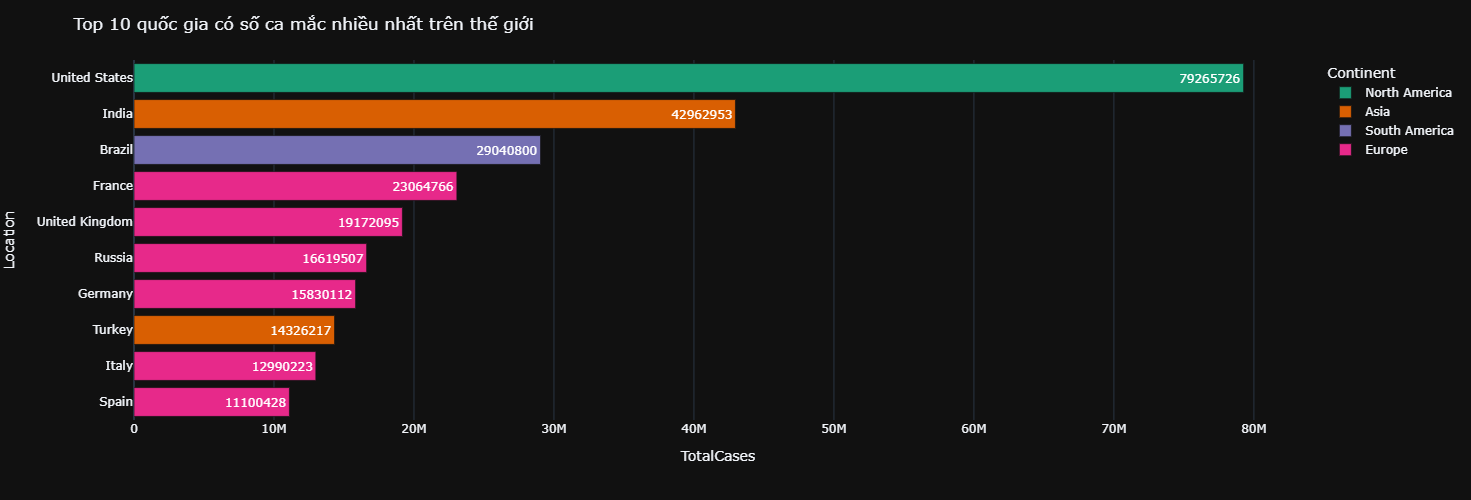

In [40]:
plot_bar(covid_country.head(10), 'TotalCases', 'Location', 'Top 10 quốc gia có số ca mắc nhiều nhất trên thế giới')

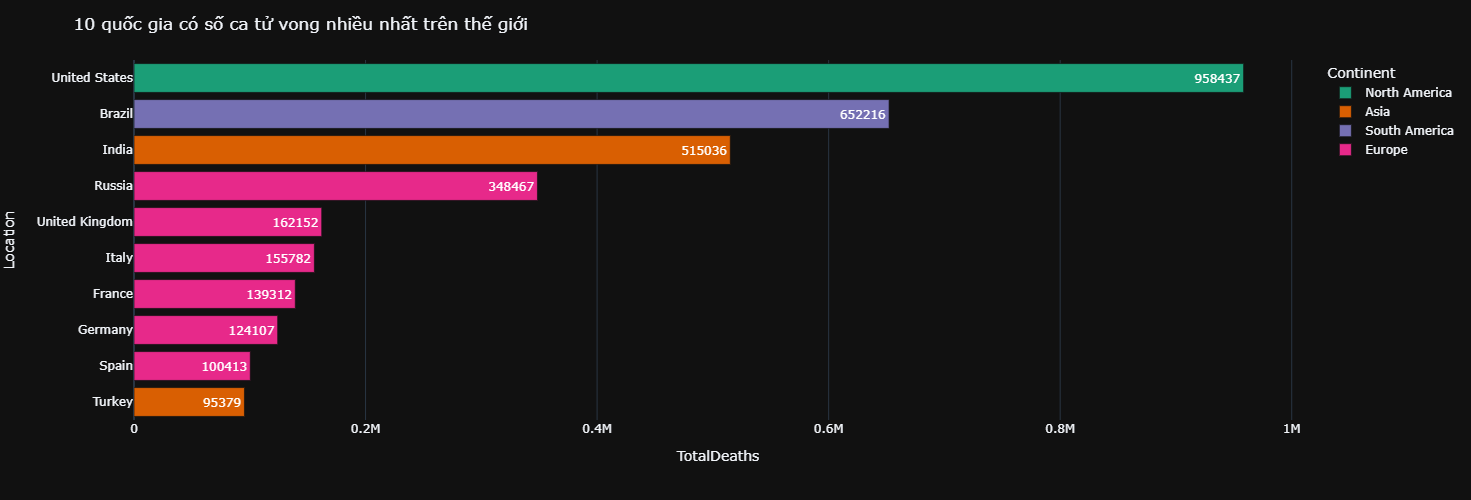

In [41]:
plot_bar(covid_country.head(10), 'TotalDeaths', 'Location', '10 quốc gia có số ca tử vong nhiều nhất trên thế giới')

Tính tỷ lệ tử vong của các quốc gia trên thế giới

In [42]:
covid_country['Mortality'] = round((covid_country['TotalDeaths']/covid_country['TotalCases']), 4)

Clean data

In [43]:
covid_country = covid_country.replace('', np.nan).fillna(0)

In [44]:
list_top_10_countries_by_GDP_in_2022 = list(['United States',
'China', 'Japan', 'Germany', 'United Kingdom', 'India', 'France', 'Canada', 'Italy', 'Brazil'])

list_worst_10_countries_by_GDP_in_2022 = list(['Vietnam', 'Hong Kong',
'Luxembourg', 'Libya', 'Mexico', 'Namibia', 'Kosovo', 'Togo', 'Congo', 'Latvia'])


covid_data_poor = pd.DataFrame()
covid_data_rick = pd.DataFrame()
def create_data (data, list):
    for i in list:
        data = pd.concat([data, covid_country.loc[covid_country['Location'] == i]]) 
    return data
covid_data_rick = create_data(covid_data_rick, list_top_10_countries_by_GDP_in_2022)
covid_data_poor = create_data(covid_data_poor, list_worst_10_countries_by_GDP_in_2022)

In [45]:
covid_data_poor = covid_data_poor[['TotalCases', 'TotalDeaths', 'Mortality']]
covid_data_poor['economy'] = 'median'

covid_data_rick = covid_data_rick[['TotalCases', 'TotalDeaths', 'Mortality']]
covid_data_rick['economy'] = 'height'
covid_data_economy = covid_data_poor
covid_data_economy = pd.concat([covid_data_economy, covid_data_rick])
covid_data_economy

TotalCases  TotalDeaths  Mortality economy
Location                                                  
Vietnam          4232520.0      40726.0     0.0096  median
Hong Kong         440609.0       1774.0     0.0040  median
Luxembourg        186360.0        996.0     0.0053  median
Libya             497279.0       6288.0     0.0126  median
Mexico           5554392.0     319604.0     0.0575  median
Namibia           157324.0       4013.0     0.0255  median
Kosovo            226579.0       3117.0     0.0138  median
Togo               36815.0        272.0     0.0074  median
Congo              24020.0        378.0     0.0157  median
Latvia            697548.0       5348.0     0.0077  median
United States   79265726.0     958437.0     0.0121  height
China             110868.0       4654.0     0.0420  height
Japan            5341246.0      24816.0     0.0046  height
Germany         15830112.0     124107.0     0.0078  height
United Kingdom  19172095.0     162152.0     0.0085  height
India           42962953.0     515036.0     0.0120  height
France          23064766.0     139312.0     0.0060  height
Canada           3334009.0      36998.0     0.0111  height
Italy           12990223.0     155782.0     0.0120  height
Brazil          29040800.0     652216.0     0.0225  height

In [46]:
def plt_boxplot (data, title):
    plt.figure(figsize = (10, 10))
    sns.boxplot(y='Mortality', x = 'economy', data= data).set(title= title)
    sns.swarmplot(x='economy', y='Mortality', data=data, color='red')
    plt.show()


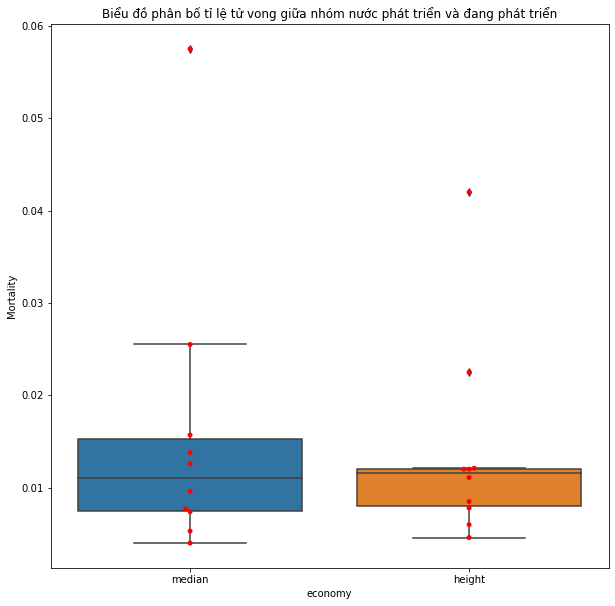

In [47]:
plt_boxplot (covid_data_economy, 'Biểu đồ phân bố tỉ lệ tử vong giữa nhóm nước phát triển và đang phát triển')

Nhận xét
1. Qua biêu đồ Boxplot ta thấy tỷ lệ tử vong của các nước có nền kinh tế đang phát triển có miền giá trị lớn hơn các nước phát triển.
2. Tỷ lệ tử vong trung bình của các nước có nền kinh tế phát triển cao hơn so với các nước có nên kinh tế đang phát triển.

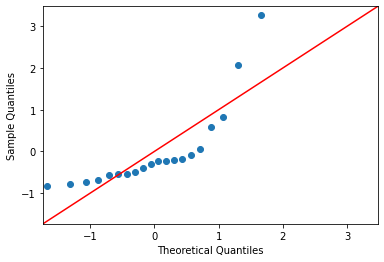

In [48]:
# Biểu đồ qq plot
sm.qqplot(covid_data_economy['Mortality'], dist=stats.norm, line="45", fit="true")
pylab.show()

Thực hiện kiểm định thống kê cho 2 nhóm các quốc gia có nền kinh tế phát triển và nền kinh tế kém phát triển hơn

Mối quan hệ giữa hai biến C (Nhóm kinh tế) --> Q (Tỉ lệ tử vong): hai nhóm độc lập => Ta thực hiện T-test

In [49]:
t, p = stats.ttest_ind(covid_data_poor['Mortality'], covid_data_rick['Mortality'])
print ('H0: tỉ lệ tử vong tại nhóm quốc gia phát triển và nhóm các quốc gia đang phát triển là như nhau.')
print ('H1: tỉ lệ tử vong tại nhóm quốc gia phát triển sẽ cao hơn so với các quốc gia đang phát triển.')
print ('Giá trị p tính được là kiểm định hai phía: p = ', p)
print ('Vì ta kiểm định 1 phía nên p value = p/2 = ', p/2)
p = p/2
print (f'Ta có p_value = {p} > 0,05 => không thể bác bỏ giả thuyết H0')

H0: tỉ lệ tử vong tại nhóm quốc gia phát triển và nhóm các quốc gia đang phát triển là như nhau.
H1: tỉ lệ tử vong tại nhóm quốc gia phát triển sẽ cao hơn so với các quốc gia đang phát triển.
Giá trị p tính được là kiểm định hai phía: p =  0.7414272077986315
Vì ta kiểm định 1 phía nên p value = p/2 =  0.37071360389931574
Ta có p_value = 0.37071360389931574 > 0,05 => không thể bác bỏ giả thuyết H0


Nhận xét: Từ giả thuyết ở trên ta thấy, kinh tế không phải nhân tố quyết định mức độ nghiêm trọng của dịch covid-19. Mức độ nghiêm trọng của dịch covid ngoài nền kinh tế thì còn một số nguyên nhân quan trọng khác, ví dụ như: Chính sách phòng chống dịch bệnh của các quốc gia, thời tiết của mỗi khu vực và sức khỏe của dân cư.

## Câu 3: Khi vaccine được phổ biến, điều đó có giúp ích cho việc chống đại dịch Covid-19 trên thế giới?

Dựa vào input đầu vào là các biến `Date`, `PeopleFullyVaccinated`, `NewCases`, `NewDeaths` để xác định xem liệu khi độ bao phủ của vaccine trên thế giới lớn dần thì số ca mắc mới và tử vong mới mỗi ngày có giảm đi không, đánh giá độ hiệu quả của vaccine đối với đại dịch Covid-19 thông qua tỉ lệ tử vong.

In [50]:
first_date_vaccine = covid_world_df[covid_world_df['TotalVaccinations'] != 0].iloc[0]['Date']
print(f"Vaccine được đưa vào sử dụng đầu tiên vào ngày {first_date_vaccine}")

Vaccine được đưa vào sử dụng đầu tiên vào ngày 2020-12-04


Tình hình dịch bệnh trên thế giới sau khi triển khai tiêm vaccine

In [51]:
covid_world_after_vaccine = covid_world_df[covid_world_df['Date'] >= first_date_vaccine]
covid_world_after_vaccine

Continent Location        Date   TotalCases   NewCases  \
163740         0    World  2020-12-04   66049040.0   688697.0   
163741         0    World  2020-12-05   66697974.0   648934.0   
163742         0    World  2020-12-06   67234273.0   536299.0   
163743         0    World  2020-12-07   67761913.0   527640.0   
163744         0    World  2020-12-08   68405171.0   643258.0   
...          ...      ...         ...          ...        ...   
164192         0    World  2022-03-01  438528632.0  1536867.0   
164193         0    World  2022-03-02  440180084.0  1651452.0   
164194         0    World  2022-03-03  442067549.0  1887465.0   
164195         0    World  2022-03-04  443767689.0  1704138.0   
164196         0    World  2022-03-05  445129499.0  1361810.0   

        TotalCases_per_million  NewCases_per_million  TotalDeaths  NewDeaths  \
163740                8387.216                87.454    1576378.0    12460.0   
163741                8469.621                82.405    1586715.0    10337.0   
163742                8537.723                68.102    1594444.0     7729.0   
163743                8604.725                67.002    1603158.0     8714.0   
163744                8686.409                81.684    1615473.0    12317.0   
...                        ...                   ...          ...        ...   
164192               55686.418               195.159    5964706.0     8069.0   
164193               55896.127               209.709    5972651.0     7945.0   
164194               56135.806               239.679    5981034.0     8384.0   
164195               56351.698               216.399    5989802.0     8771.0   
164196               56524.627               172.929    5995245.0     5443.0   

        TotalDeaths_per_million  NewDeaths_per_million  TotalVaccinations  \
163740                  200.176                  1.582       1.000000e+00   
163741                  201.488                  1.313       1.000000e+00   
163742                  202.470                  0.981       1.000000e+00   
163743                  203.577                  1.107       2.000000e+00   
163744                  205.140                  1.564       8.000000e+00   
...                         ...                    ...                ...   
164192                  757.426                  1.025       1.072498e+10   
164193                  758.435                  1.009       1.073855e+10   
164194                  759.500                  1.065       1.075182e+10   
164195                  760.613                  1.114       1.076247e+10   
164196                  761.304                  0.691       1.085079e+10   

        PeopleVaccinated  PeopleFullyVaccinated  \
163740      1.000000e+00           0.000000e+00   
163741      1.000000e+00           0.000000e+00   
163742      1.000000e+00           0.000000e+00   
163743      2.000000e+00           0.000000e+00   
163744      8.000000e+00           0.000000e+00   
...                  ...                    ...   
164192      4.971171e+09           4.385303e+09   
164193      4.972139e+09           4.387583e+09   
164194      4.973141e+09           4.393034e+09   
164195      4.974734e+09           4.396314e+09   
164196      4.976031e+09           4.400787e+09   

        PeopleFullyVaccinated_per_hundred    Population  
163740                               0.00  7.874966e+09  
163741                               0.00  7.874966e+09  
163742                               0.00  7.874966e+09  
163743                               0.00  7.874966e+09  
163744                               0.00  7.874966e+09  
...                                   ...           ...  
164192                              55.69  7.874966e+09  
164193                              55.72  7.874966e+09  
164194                              55.78  7.874966e+09  
164195                              55.83  7.874966e+09  
164196                              55.88  7.874966e+09  

[457 rows x 16 columns]

Tình hình dịch bệnh trên thế giới trước khi triển khai tiêm vaccine

In [52]:
covid_world_before_vaccine = covid_world_df[covid_world_df['Date'] < first_date_vaccine]
covid_world_before_vaccine

Continent Location        Date  TotalCases  NewCases  \
163423         0    World  2020-01-22       557.0       0.0   
163424         0    World  2020-01-23       657.0     100.0   
163425         0    World  2020-01-24       944.0     287.0   
163426         0    World  2020-01-25      1437.0     493.0   
163427         0    World  2020-01-26      2120.0     683.0   
...          ...      ...         ...         ...       ...   
163735         0    World  2020-11-29  62890192.0  482385.0   
163736         0    World  2020-11-30  63397591.0  507399.0   
163737         0    World  2020-12-01  64021419.0  623828.0   
163738         0    World  2020-12-02  64668183.0  646764.0   
163739         0    World  2020-12-03  65360343.0  692160.0   

        TotalCases_per_million  NewCases_per_million  TotalDeaths  NewDeaths  \
163423                   0.071                 0.000         17.0        0.0   
163424                   0.083                 0.013         18.0        1.0   
163425                   0.120                 0.036         26.0        8.0   
163426                   0.182                 0.063         42.0       16.0   
163427                   0.269                 0.087         56.0       14.0   
...                        ...                   ...          ...        ...   
163735                7986.091                61.256    1516949.0     7295.0   
163736                8050.523                64.432    1525916.0     8967.0   
163737                8129.739                79.217    1538675.0    12759.0   
163738                8211.868                82.129    1551318.0    12643.0   
163739                8299.762                87.894    1563918.0    12600.0   

        TotalDeaths_per_million  NewDeaths_per_million  TotalVaccinations  \
163423                    0.002                  0.000                0.0   
163424                    0.002                  0.000                0.0   
163425                    0.003                  0.001                0.0   
163426                    0.005                  0.002                0.0   
163427                    0.007                  0.002                0.0   
...                         ...                    ...                ...   
163735                  192.629                  0.926                0.0   
163736                  193.768                  1.139                0.0   
163737                  195.388                  1.620                0.0   
163738                  196.994                  1.605                0.0   
163739                  198.594                  1.600                0.0   

        PeopleVaccinated  PeopleFullyVaccinated  \
163423               0.0                    0.0   
163424               0.0                    0.0   
163425               0.0                    0.0   
163426               0.0                    0.0   
163427               0.0                    0.0   
...                  ...                    ...   
163735               0.0                    0.0   
163736               0.0                    0.0   
163737               0.0                    0.0   
163738               0.0                    0.0   
163739               0.0                    0.0   

        PeopleFullyVaccinated_per_hundred    Population  
163423                                0.0  7.874966e+09  
163424                                0.0  7.874966e+09  
163425                                0.0  7.874966e+09  
163426                                0.0  7.874966e+09  
163427                                0.0  7.874966e+09  
...                                   ...           ...  
163735                                0.0  7.874966e+09  
163736                                0.0  7.874966e+09  
163737                                0.0  7.874966e+09  
163738                                0.0  7.874966e+09  
163739                                0.0  7.874966e+09  

[317 rows x 16 columns]

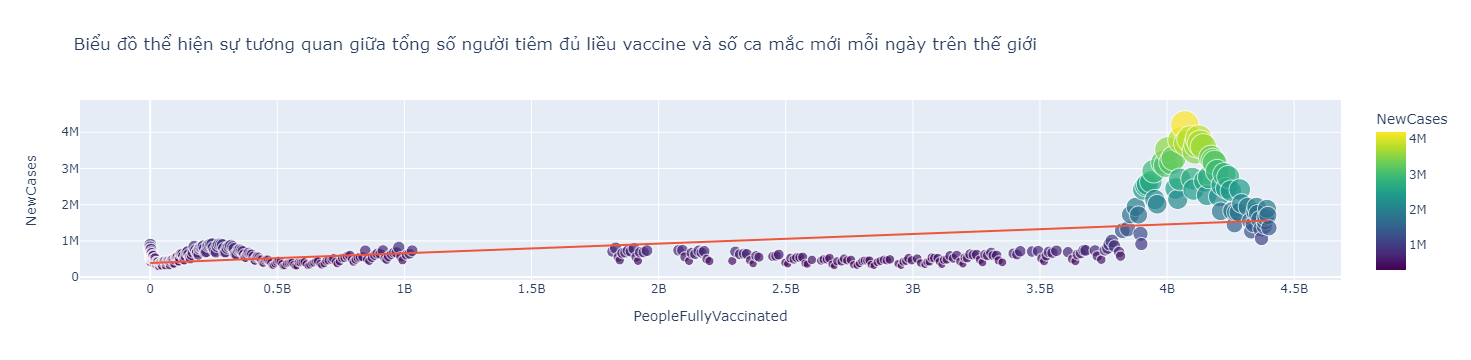

In [53]:
plot_scatter(covid_world_after_vaccine, "PeopleFullyVaccinated", "NewCases", "Biểu đồ thể hiện sự tương quan giữa tổng số người tiêm đủ liều vaccine và số ca mắc mới mỗi ngày trên thế giới", "Date")

In [54]:
R_newcases = np.corrcoef(covid_world_after_vaccine["PeopleFullyVaccinated"], covid_world_after_vaccine["NewCases"])
R_newcases

array([[1.        , 0.57672504],
       [0.57672504, 1.        ]])

Tuy hệ số tương quan không mạnh nhưng ta vẫn có thể thấy số ca mắc mới mỗi ngày vẫn tăng khi số lượng người thực hiện tiêm đầy đủ vaccine tăng lên.

Tuy nhiên, để đánh giá mức độ giúp ích của vaccine, ta hãy xét về số ca tử vong mỗi ngày sau khi tiến hành tiêm vaccine.

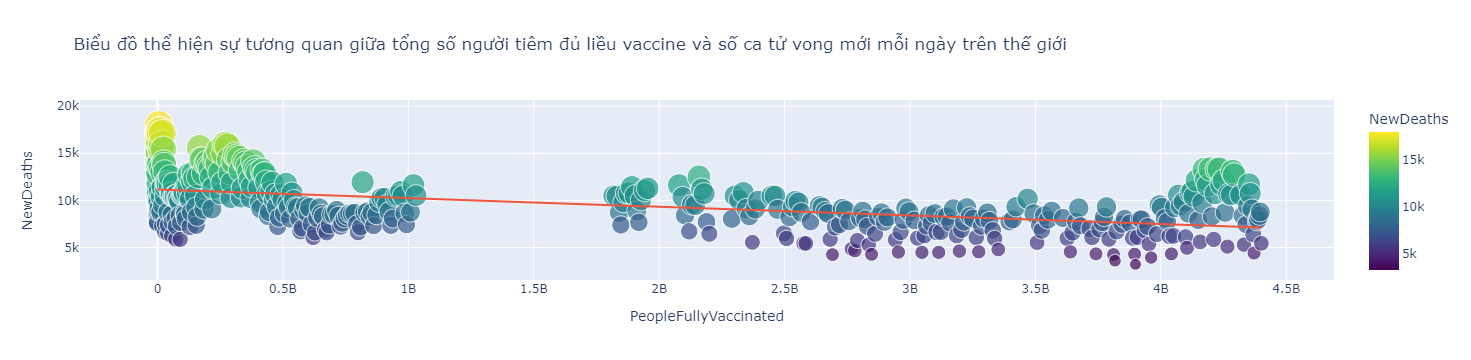

In [55]:
plot_scatter(covid_world_after_vaccine, "PeopleFullyVaccinated", "NewDeaths", "Biểu đồ thể hiện sự tương quan giữa tổng số người tiêm đủ liều vaccine và số ca tử vong mới mỗi ngày trên thế giới", "Date")

In [56]:
R_newdeaths = np.corrcoef(covid_world_after_vaccine["PeopleFullyVaccinated"], covid_world_after_vaccine["NewDeaths"])
R_newdeaths

array([[ 1.        , -0.50467566],
       [-0.50467566,  1.        ]])

Ta thấy đường khớp dữ liệu là nghịch biến, và hệ số tương quan cũng không mạnh. Do đó, vaccine phần nào đã giúp khống chế số ca tử vong mỗi ngày trên thế giới.

Điều đó cũng cho thấy vaccine đang thực sự giúp ích cho việc chống đại dịch Covid-19 trên thế giới

Tính tỉ lệ tử vong mỗi ngày trước và sau khi tiêm vaccine

In [57]:
covid_world_before_vaccine["Mortality"] = round((covid_world_before_vaccine['NewDeaths']/covid_world_before_vaccine['NewCases']), 4)
covid_world_after_vaccine["Mortality"] = round((covid_world_after_vaccine['NewDeaths']/covid_world_after_vaccine['NewCases']), 4)
covid_world_before_vaccine = covid_world_before_vaccine.replace('', np.nan).fillna(0)
covid_world_after_vaccine = covid_world_after_vaccine.replace('', np.nan).fillna(0)

C:\Users\nguye\AppData\Local\Temp\ipykernel_5696\4088823143.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nguye\AppData\Local\Temp\ipykernel_5696\4088823143.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
def plot_bar():
    bars = []
    bars.append(go.Bar(
        x = covid_world_before_vaccine["Date"],
        y = covid_world_before_vaccine["Mortality"],
        marker={'color': 'yellow'},
        name = 'Before'
    ))
    bars.append(go.Bar(
        x = covid_world_after_vaccine["Date"],
        y = covid_world_after_vaccine["Mortality"],
        marker={'color': 'blue'},
        name = 'After'
    ))

    fig = go.FigureWidget(data=bars)
    fig.update_layout(
        template='plotly_dark',
        title = "Tỉ lệ tử vong các ngày trước và sau khi tiêm vaccine"
        )
    fig.show()

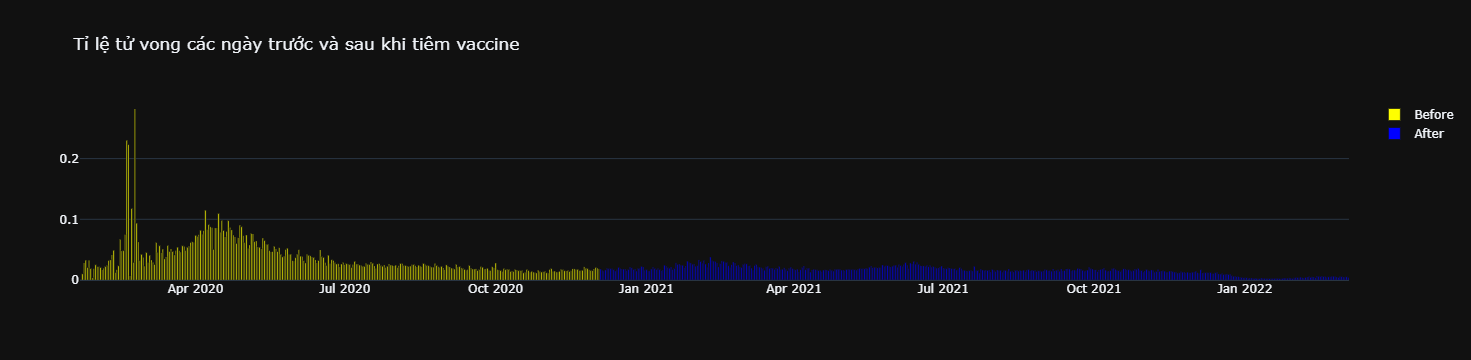

In [59]:
plot_bar()

Từ biểu đồ ta cũng có thể thấy được rằng tỉ lệ tử vong vì Covid-19 trước khi tiêm vaccine lớn hớn so với sau khi tiêm vaccine.

Để có thể đưa ra kết luận chắc chắn, ta thực hiện kiểm định thống kê trên 2 nhóm độc lập: tình hình dịch bệnh các ngày trước và sau khi tiêm vaccine trên thế giới.

Ta đặt giả thuyết:

`H0: tỉ lệ tử vong các ngày trước và sau khi tiêm vaccine là như nhau`

`H1: tỉ lệ tử vong các ngày trước khi tiêm vaccine cao hơn sau khi tiêm.`

In [60]:
t, p = stats.ttest_ind(covid_world_before_vaccine['Mortality'], covid_world_after_vaccine['Mortality'])
print ('Giá trị p tính được là kiểm định hai phía: p = ', p)
print ('Vì ta kiểm định 1 phía nên p_value = p/2 = ', p/2)
p = p/2
print (f'Ta có p_value = {p} < 0,05 và t = {t} > 0 => Ta bác bỏ giả thuyết H0, chấp nhận H1')

Giá trị p tính được là kiểm định hai phía: p =  1.3756703062376602e-39
Vì ta kiểm định 1 phía nên p_value = p/2 =  6.878351531188301e-40
Ta có p_value = 6.878351531188301e-40 < 0,05 và t = 13.945868874153058 > 0 => Ta bác bỏ giả thuyết H0, chấp nhận H1


Nhận xét: Vậy tỉ lệ tử vong trên thế giới ở thời điểm trước khi tiêm vaccine cao hơn sau khi đã triển khai tiêm vaccine. Do đó, vaccine dường như thực sự có ích trong việc chống đại dịch Covid-19 trên thế giới

## Câu 4: Biến thể Omicron xuất hiện vào 11/2021 có gây nguy hiểm không? So sánh với biến thể Delta xuất hiện vào tháng 12/2020.

Dựa vào input đầu vào là các biến `Date`, `NewCases`, `NewDeaths` để xác định xem có phải số ca mắc mới tăng thì số ca tử vong mới mỗi ngày cũng tăng lên  giữa hai loại biến thể `DELTA` và `OMICRON`, đồng thờI thực hiện kiểm định giả thuyết để xem tỉ lệ tử vong của loại biến thể nào cao hơn, từ đó đưa ra nhận xét

In [61]:
covid_compare = covid_world_df[['Date', 'NewCases', 'NewDeaths']]
covid_compare['Date'] = pd.to_datetime(covid_compare['Date'])
covid_compare['Month_Years']=pd.to_datetime(covid_compare['Date']).dt.strftime('%Y-%m')
covid_compare['Mortality'] = covid_compare['NewDeaths'] / covid_compare['NewCases']
covid_compare = covid_compare.replace('', np.nan).fillna(0)
covid_compare

C:\Users\nguye\AppData\Local\Temp\ipykernel_5696\3503548437.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nguye\AppData\Local\Temp\ipykernel_5696\3503548437.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nguye\AppData\Local\Temp\ipykernel_5696\3503548437.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Date   NewCases  NewDeaths Month_Years  Mortality
163423 2020-01-22        0.0        0.0     2020-01   0.000000
163424 2020-01-23      100.0        1.0     2020-01   0.010000
163425 2020-01-24      287.0        8.0     2020-01   0.027875
163426 2020-01-25      493.0       16.0     2020-01   0.032454
163427 2020-01-26      683.0       14.0     2020-01   0.020498
...           ...        ...        ...         ...        ...
164192 2022-03-01  1536867.0     8069.0     2022-03   0.005250
164193 2022-03-02  1651452.0     7945.0     2022-03   0.004811
164194 2022-03-03  1887465.0     8384.0     2022-03   0.004442
164195 2022-03-04  1704138.0     8771.0     2022-03   0.005147
164196 2022-03-05  1361810.0     5443.0     2022-03   0.003997

[774 rows x 5 columns]

In [62]:
date_omicron = pd.to_datetime(datetime.date(2021,11,24)).strftime('%Y-%m')
date_delta = pd.to_datetime(datetime.date(2020,12,1)).strftime('%Y-%m')
date_bound = pd.to_datetime(datetime.date(2022,3,1)).strftime('%Y-%m')
covid_compare = covid_compare[covid_compare["Month_Years"] < date_bound]
covid_omicron = covid_compare[covid_compare["Month_Years"] >= date_omicron]
covid_delta = covid_compare[covid_compare["Month_Years"] < date_omicron]
covid_delta = covid_delta[covid_delta["Month_Years"] >= date_delta]

In [63]:
covid_compare.dtypes

Date           datetime64[ns]
NewCases              float64
NewDeaths             float64
Month_Years            object
Mortality             float64
dtype: object

In [64]:
def plot_ticks(df, var, col, title, is_group):
    if is_group:
        df= df.groupby(by=var).agg({var : 'first',col : 'sum'})
    df_omicron = df[df[var] >= date_omicron]
    df_delta = df[df[var] < date_omicron]
    df_delta = df_delta[df_delta[var] >= date_delta]
    bars = []
    bars.append(go.Bar(
        x = df_delta[var],
        y = df_delta[col],
        marker={'color': 'red'},
        name = 'Delta'
    ))
    bars.append(go.Bar(
        x = df_omicron[var],
        y = df_omicron[col],
        marker={'color': 'green'},
        name = 'Omicron'
    ))

    fig = go.FigureWidget(data=bars)
    fig.update_layout(
        template='plotly_dark',
        title = title
        )
    fig.show()


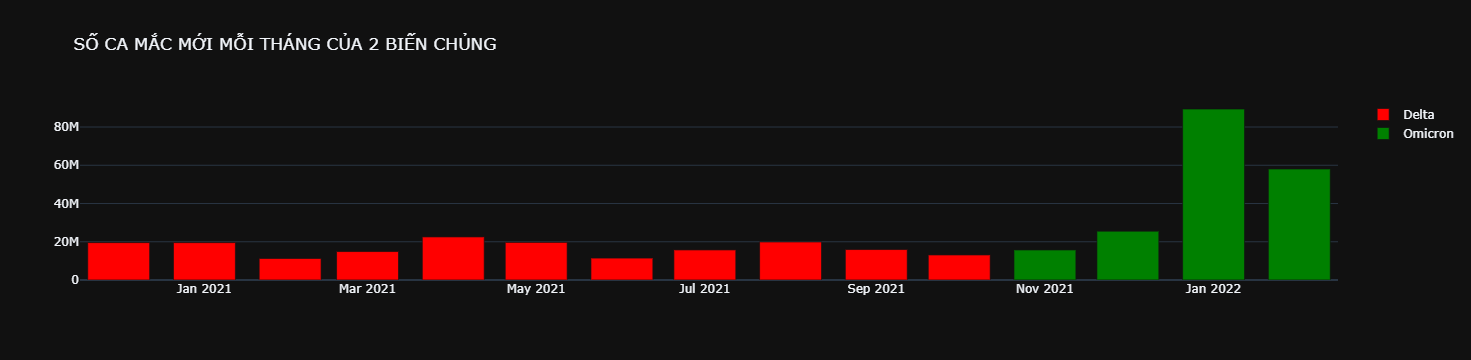

In [65]:
plot_ticks(covid_compare, "Month_Years", "NewCases", 'SỐ CA MẮC MỚI MỖI THÁNG CỦA 2 BIẾN CHỦNG', is_group=True)

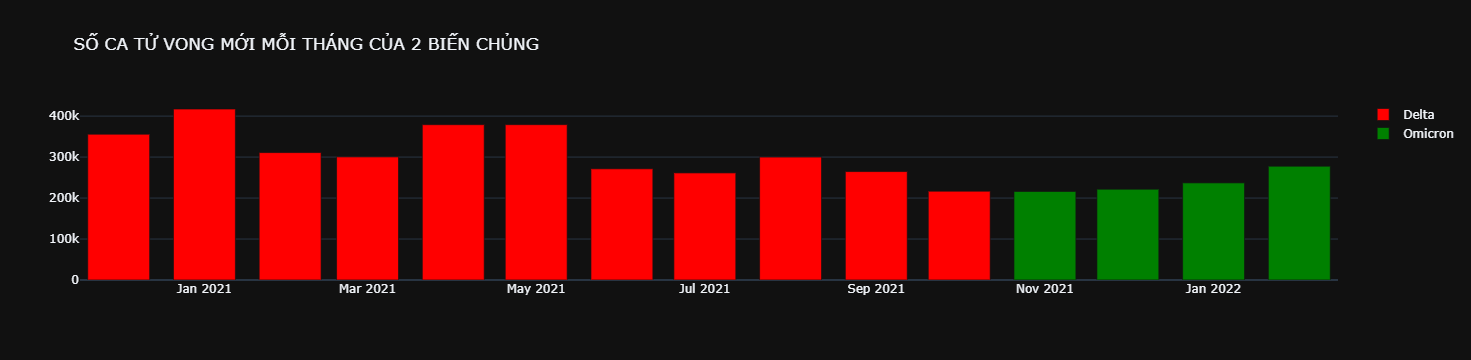

In [66]:
plot_ticks(covid_compare, "Month_Years", "NewDeaths", 'SỐ CA TỬ VONG MỚI MỖI THÁNG CỦA 2 BIẾN CHỦNG', is_group=True)

**Theo biểu đồ**
- **Do bảng số liệu chỉ lấy những ngày đầu tháng 3/2022 nên nhóm em xin phép bỏ qua tháng 3, chỉ lấy số liệu đến tháng 2/2022 để rút ra kết luận**

- **Chỉ mới xuất hiện tháng 11/2021 nhưng số ca mắc mới hàng tháng của biến chủng omicron lại tăng một cách không kiếm soát được. Số ca mắc của biến chủng này nhìn chung cao hơn rất nhiều so với biến chủng delta trước đó.**

- **Tuy nhiên, số ca tử vong mới hàng tháng của biến chủng omicron có phần ít hơn biến chủng delta , mắc dù biến chủng này xuất hiện sau và số ca mắc đang có xu hướng tăng lên theo mỗi tháng.**

**Ta sẽ xem xét mối quan hệ giữa 2 biến số `NewCases` và `NewDeaths` để có thể đưa ra nhận xét xem số ca tử vong mới có tăng lên khi số ca mắc mới lần lượt tăng của cả hai biến thể bằng biểu đồ `Scatter`**

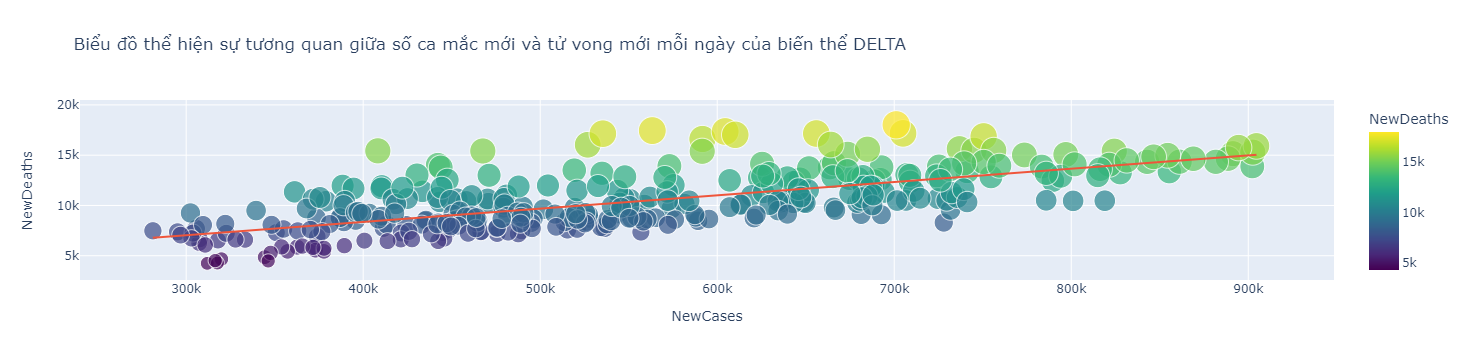

In [67]:
plot_scatter(covid_delta, "NewCases", "NewDeaths", "Biểu đồ thể hiện sự tương quan giữa số ca mắc mới và tử vong mới mỗi ngày của biến thể DELTA", "Date")

Ta tính hệ số tương quan của đường tuyến tính

In [68]:
R_delta = np.corrcoef(covid_delta["NewCases"], covid_delta["NewDeaths"])
R_delta

array([[1.        , 0.69575551],
       [0.69575551, 1.        ]])

In [69]:
print(f"Hệ số tương quan giữa 2 biến là R = {R_delta[0][1]} cho thấy đường tuyến tính tương quan thuận, có độ mạnh trung bình. \
Với biến chủng Delta, số ca mắc mới tăng thì số ca tử vong cũng tăng theo")

Hệ số tương quan giữa 2 biến là R = 0.6957555110837915 cho thấy đường tuyến tính tương quan thuận, có độ mạnh trung bình. Với biến chủng Delta, số ca mắc mới tăng thì số ca tử vong cũng tăng theo


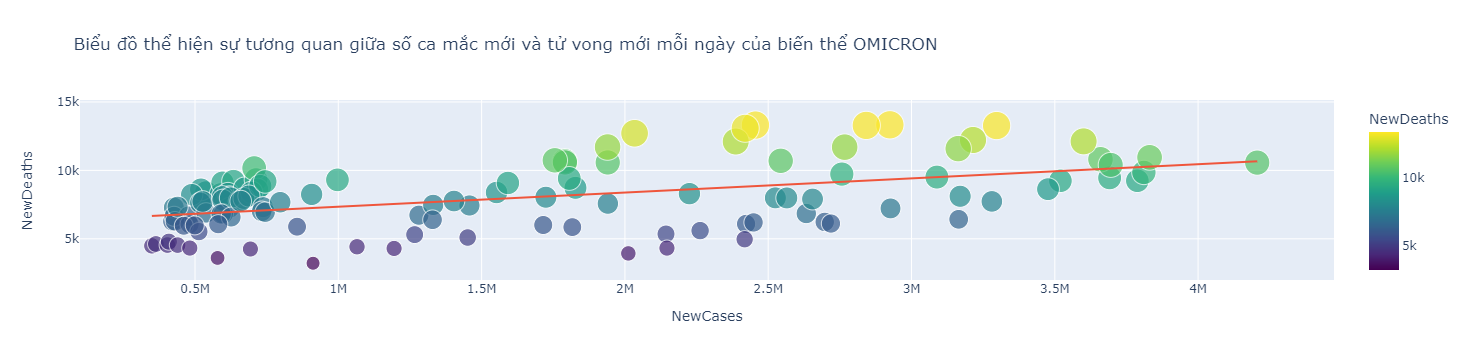

In [70]:
plot_scatter(covid_omicron, "NewCases", "NewDeaths", "Biểu đồ thể hiện sự tương quan giữa số ca mắc mới và tử vong mới mỗi ngày của biến thể OMICRON", "Date")

Ta tính hệ số tương quan của đường tuyến tính

In [71]:
R_omicron = np.corrcoef(covid_omicron["NewCases"], covid_omicron["NewDeaths"])
R_omicron

array([[1.        , 0.48769221],
       [0.48769221, 1.        ]])

In [72]:
print(f"Hệ số tương quan giữa 2 biến là R = {R_omicron[0][1]} cho thấy đường tuyến tính tương quan thuận, có độ mạnh không quá mạnh hoặc yếu nhưng không bằng biến thể Delta. \
Với biến chủng Omicron, số ca mắc mới tăng thì số ca tử vong cũng tăng nhưng mà ít hơn nhiều so với Delta => Ít nguy hiểm hơn Delta. \
Nhưng cũng không thể xem thường vì số ca mắc mớI của biến thể này tăng rất nhanh, nhanh hơn nhiều so với Delta")

Hệ số tương quan giữa 2 biến là R = 0.4876922128244155 cho thấy đường tuyến tính tương quan thuận, có độ mạnh không quá mạnh hoặc yếu nhưng không bằng biến thể Delta. Với biến chủng Omicron, số ca mắc mới tăng thì số ca tử vong cũng tăng nhưng mà ít hơn nhiều so với Delta => Ít nguy hiểm hơn Delta. Nhưng cũng không thể xem thường vì số ca mắc mớI của biến thể này tăng rất nhanh, nhanh hơn nhiều so với Delta


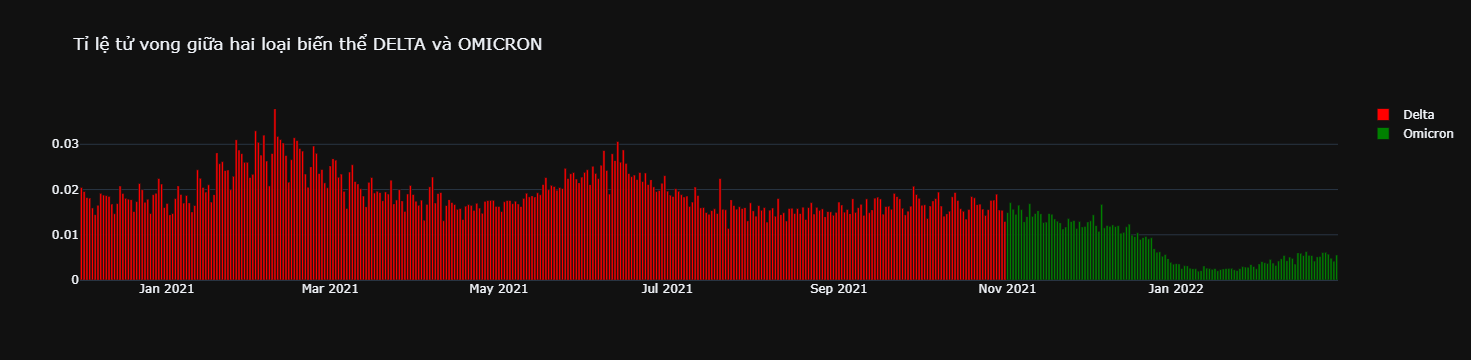

In [73]:
plot_ticks(covid_compare, "Date", "Mortality", "Tỉ lệ tử vong giữa hai loại biến thể DELTA và OMICRON", is_group=False)

Từ biểu đồ ta cũng có thể thấy được rằng tỉ lệ tử vong vì biến thể `DELTA` lớn hơn `OMICRON`.

Dựa vào biểu đồ tỷ lệ tử vong của 2 loại biến thể và hệ số tương quan, nhóm em đưa ra nhận xét:

- Biến thể `DELTA` có mối tương quan mạnh hơn so với biến thể `OMICRON`. (giữa 2 biến NewCases và NewDeaths theo từng ngày)
- Biến thể `DELTA` có tốc độ lây lan nhanh, số ca tử vong mới mỗi ngày tăng cao dẫn đến tỷ lệ tử vong cao.
- Biến thể `OMICRON` có tốc độ lây lan nhanh vượt trội so với biến thể `DELTA` (mặc dù biến thể `OMICRON` xuất hiện sau) nhưng về số ca tử vong mới mỗi ngày thì biến thể `OMICRON` ít hơn dẫn tới tỷ lệ tử vong cũng thấp hơn biến thể `DELTA`

Để có thể đưa ra kết luận chắc chắn, ta thực hiện kiểm định thống kê T-test trên 2 nhóm độc lập: tình hình dịch bệnh các ngày của hai nhóm biến thể `DELTA` và `OMICRON`

Ta đặt giả thuyết:

`H0: tỉ lệ tử vong của hai nhóm biến thể là như nhau`

`H1: tỉ lệ tử vong của biến thể DELTA cao hơn OMICRON.`

In [74]:
covid_omicron
t, p = stats.ttest_ind(covid_delta['Mortality'], covid_omicron['Mortality'])
print ('Giá trị p tính được là kiểm định hai phía: p = ', p)
print ('Vì ta kiểm định 1 phía nên p_value = p/2 = ', p/2)
p = p/2
print (f'Ta có p_value = {p} < 0,05 và t = {t} > 0 => Ta bác bỏ giả thuyết H0, chấp nhận H1')

Giá trị p tính được là kiểm định hai phía: p =  3.763915980121889e-83
Vì ta kiểm định 1 phía nên p_value = p/2 =  1.8819579900609447e-83
Ta có p_value = 1.8819579900609447e-83 < 0,05 và t = 24.09083434337719 > 0 => Ta bác bỏ giả thuyết H0, chấp nhận H1


Nhận xét: Vậy ta có thể đưa ra kết luận rằng tỉ lệ tử vong của nhóm biến thể `DELTA` cao hơn `OMICRON`. Do đó có thể nói tuy biến thể `OMICRON` làm gia tăng nhanh chóng số ca mắc nhưng tỉ lệ tử vọng lại thấp hơn so với biến thể `DELTA`